<a href="https://colab.research.google.com/github/mgnarag/binarization-lowres/blob/main/From_Arki_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/From Arki/"

In [9]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 3
size = 64

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,1.3):
        for i in np.arange(0,int(width/size)+1,1.3):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)


    return data

def crop_(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,1.3):
        for i in np.arange(0,int(width/size)+1,1.3):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            #im1 = im1/4
            data.append(im1)


    return data



input = np.array(crop_(ImageOps.grayscale(Image.open(file_path + "Rizal_input.png"))))
print("Done reading the input of size = ", input.shape)

output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Rizal_output.png"))))
print("Done reading the output of size = ", input.shape)

train_input = []
test_input = []
for i in range(0,len(input)):
    if i % 4 == 0:
        test_input.append(input[i])
    else:
        train_input.append(input[i])

train_input = np.array(train_input)
test_input = np.array(test_input)

print("Done reading the train input of size = ", train_input.shape)
print("Done reading the test input of size = ", test_input.shape)

train_output = []
test_output = []
for i in range(0,len(output)):
    if i % 4 == 0:
        test_output.append(output[i])
    else:
        train_output.append(output[i])

train_output = np.array(train_output)
test_output = np.array(test_output)

print("Done reading the train output of size = ", train_input.shape)
print("Done reading the test output of size = ", test_input.shape)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (115430400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Done reading the input of size =  (16895, 64, 64)
Done reading the output of size =  (16895, 64, 64)
Done reading the train input of size =  (12671, 64, 64)
Done reading the test input of size =  (4224, 64, 64)
Done reading the train output of size =  (12671, 64, 64)
Done reading the test output of size =  (4224, 64, 64)


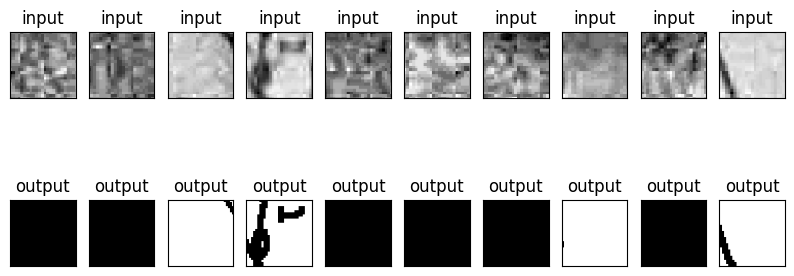

In [7]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+2000]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+2000]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [10]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()


autoencoder.save(file_path + '1 Models/' + 'autoencoder_' + str(model_number))

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+ str(model_number) + '.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+ str(model_number) + '.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")


Epoch 1/100
396/396 [==============================] - 14s 28ms/step - loss: 0.0516 - val_loss: 0.0309
Epoch 2/100
396/396 [==============================] - 11s 27ms/step - loss: 0.0278 - val_loss: 0.0253
Epoch 3/100
396/396 [==============================] - 11s 28ms/step - loss: 0.0208 - val_loss: 0.0178
Epoch 4/100
396/396 [==============================] - 11s 28ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 5/100
396/396 [==============================] - 11s 28ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 6/100
396/396 [==============================] - 11s 27ms/step - loss: 0.0172 - val_loss: 0.0167
Epoch 7/100
396/396 [==============================] - 11s 27ms/step - loss: 0.0170 - val_loss: 0.0166
Epoch 8/100
396/396 [==============================] - 11s 27ms/step - loss: 0.0169 - val_loss: 0.0172
Epoch 9/100
396/396 [==============================] - 11s 27ms/step - loss: 0.0168 - val_loss: 0.0167
Epoch 10/100
396/396 [==============================] - 11s 28ms/step - l